In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
df = Path("../histories/").glob("*.csv")
df = [pd.read_csv(csv) for csv in df]
df = pd.concat(df)

In [3]:
duplicates = df[df.duplicated(subset=["model", "epoch"], keep=False)].sort_values(by=["epoch", "model"])
print(len(duplicates))
duplicates

120


,categorical_accuracy,f1_score_per_class,f1_score_weighted,loss,val_categorical_accuracy,val_f1_score_per_class,val_f1_score_weighted,val_loss,model,epoch,type,binary_accuracy,val_binary_accuracy
3,0.727383,tf.Tensor(\n[0. 0.39999995 0.5935161 ...,0.712994,0.945003,0.713178,tf.Tensor(\n[0. 0.39999995 0.6341463 ...,0.664128,1.017141,inception_v3_filtered_multiclass,3,CLF,NaN,NaN
0,0.665050,tf.Tensor(\n[0. 0.25196844 0.4711779 ...,0.636696,1.298128,0.782946,tf.Tensor(\n[0. 0.3636363 0.71794873 ...,0.738608,1.008757,inception_v3_filtered_multiclass,3,FT,NaN,NaN
4,0.716226,tf.Tensor(\n[0.15999997 0.39855066 0.57487917 ...,0.707532,1.053200,0.732558,tf.Tensor(\n[0. 0.25806448 0.41379306 ...,0.676958,0.972043,inception_v3_filtered_multiclass,4,CLF,NaN,NaN
1,0.792142,tf.Tensor(\n[0. 0.39999992 0.7651331 ...,0.769953,0.980588,0.804264,tf.Tensor(\n[0. 0.32432428 0.711111 ...,0.765011,0.799893,inception_v3_filtered_multiclass,4,FT,NaN,NaN
5,0.715013,tf.Tensor(\n[0.1333333 0.4214559 0.5777777 ...,0.708694,1.163493,0.738372,tf.Tensor(\n[0. 0.29999992 0.41379306 ...,0.682874,1.124183,inception_v3_filtered_multiclass,5,CLF,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,NaN,tf.Tensor(\n[0.59259254 0.8062015 0.8878048 ...,0.908962,0.022228,NaN,tf.Tensor(\n[0. 0.3783783 0.74999994 ...,0.788702,0.050500,mobilenetv2_1.00_224_filtered_multilabel,41,FT,0.993158,0.982248
42,NaN,tf.Tensor(\n[0.75 0.6942149 0.8184019 ...,0.878813,0.025104,NaN,tf.Tensor(\n[0. 0.275862 0.8372093 ...,0.778380,0.044385,mobilenetv2_1.00_224_filtered_multilabel,42,CLF,0.990548,0.984651
3,NaN,tf.Tensor(\n[0.77419347 0.875 0.95550346 ...,0.949207,0.015433,NaN,tf.Tensor(\n[0. 0.3428571 0.7659575 ...,0.795213,0.049136,mobilenetv2_1.00_224_filtered_multilabel,42,FT,0.996059,0.983256
43,NaN,tf.Tensor(\n[0.84848475 0.70634913 0.821256 ...,0.878743,0.025169,NaN,tf.Tensor(\n[0. 0.275862 0.8372093 ...,0.769316,0.044615,mobilenetv2_1.00_224_filtered_multilabel,43,CLF,0.990519,0.984264


In [4]:
df = df.drop_duplicates(subset=["model", "epoch"], keep="last").reset_index(drop=True)

In [5]:
# Unfiltered Multiclass
ufmc = df[df.model.str.contains("_unfiltered_multiclass")]
# Filtered Multiclass
fmc = df[df.model.str.contains("_filtered_multiclass")]
# Filtered Multilabel
fml = df[df.model.str.contains("_filtered_multilabel")]

# Multiclass: Unfiltered vs Filtered

In [6]:
model_names = ["mobilenetv2", "vgg16", "inception_v3", "inception_resnet_v2"]

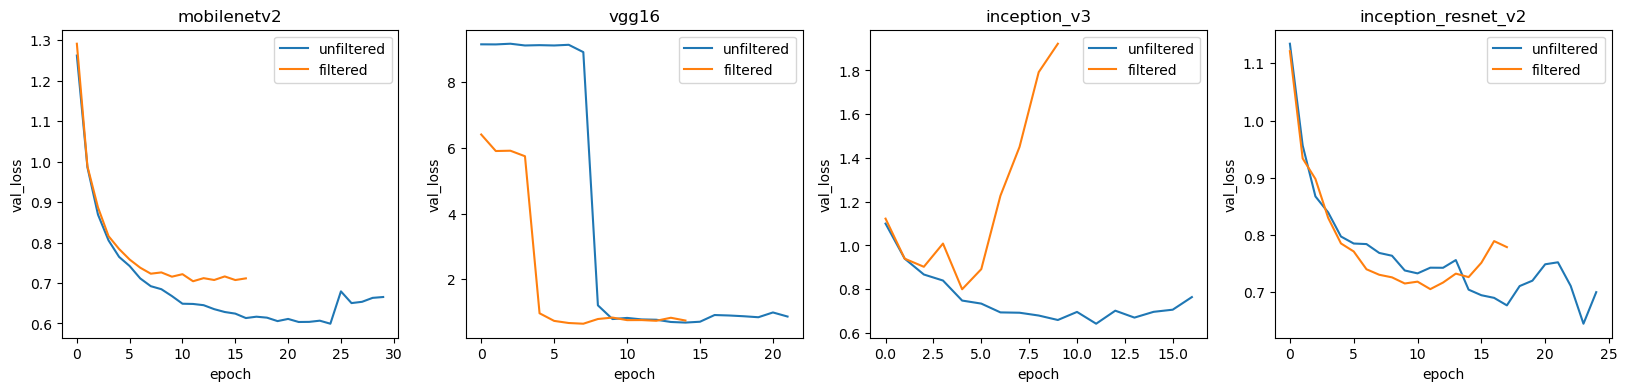

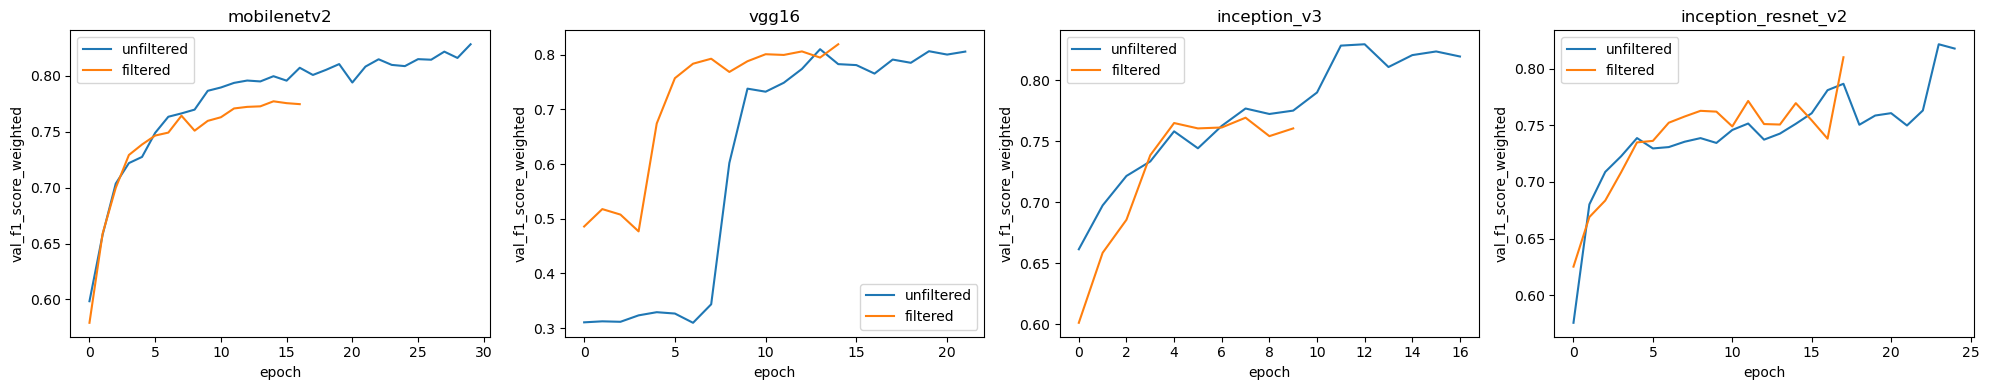

In [24]:
metric = "val_loss"
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for i, model_name in enumerate(model_names):
    data1 = ufmc[ufmc.model.str.contains(model_name)].sort_values(by="epoch")
    data2 = fmc[fmc.model.str.contains(model_name)].sort_values(by="epoch")
    
    ax = axes[i]
    ax.plot(data1.epoch, data1[metric], label="unfiltered")
    ax.plot(data2.epoch, data2[metric], label="filtered")
    ax.set(xlabel="epoch", ylabel=metric, title=model_name)
    ax.legend()


metric = "val_f1_score_weighted"
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for i, model_name in enumerate(model_names):
    data1 = ufmc[ufmc.model.str.contains(model_name)].sort_values(by="epoch")
    data2 = fmc[fmc.model.str.contains(model_name)].sort_values(by="epoch")
    
    ax = axes[i]
    ax.plot(data1.epoch, data1[metric], label="unfiltered")
    ax.plot(data2.epoch, data2[metric], label="filtered")
    ax.set(xlabel="epoch", ylabel=metric, title=model_name)
    ax.legend()


plt.tight_layout()
plt.show()

# Filtered: Multiclass vs Multilabel

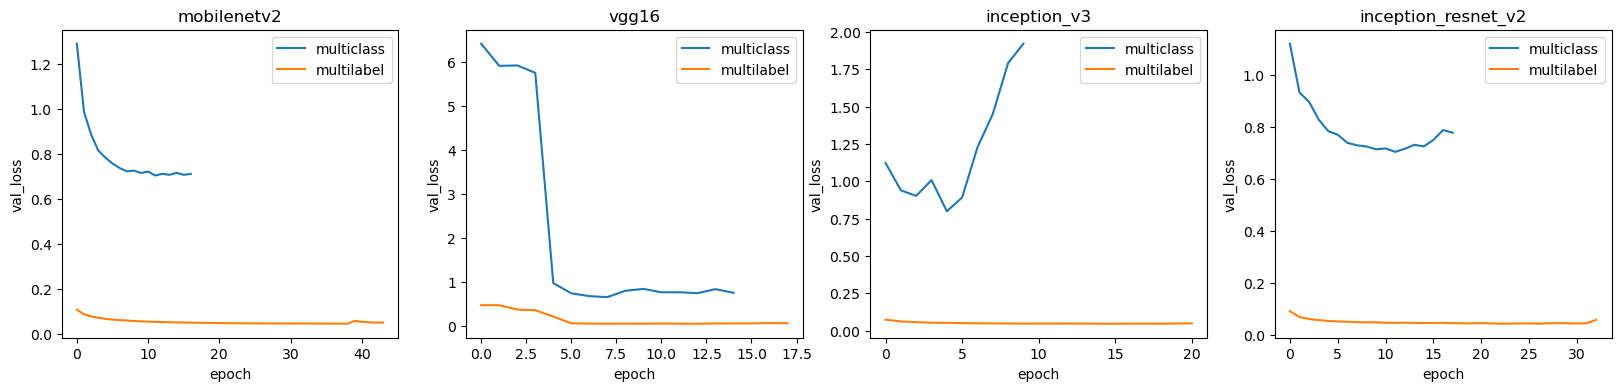

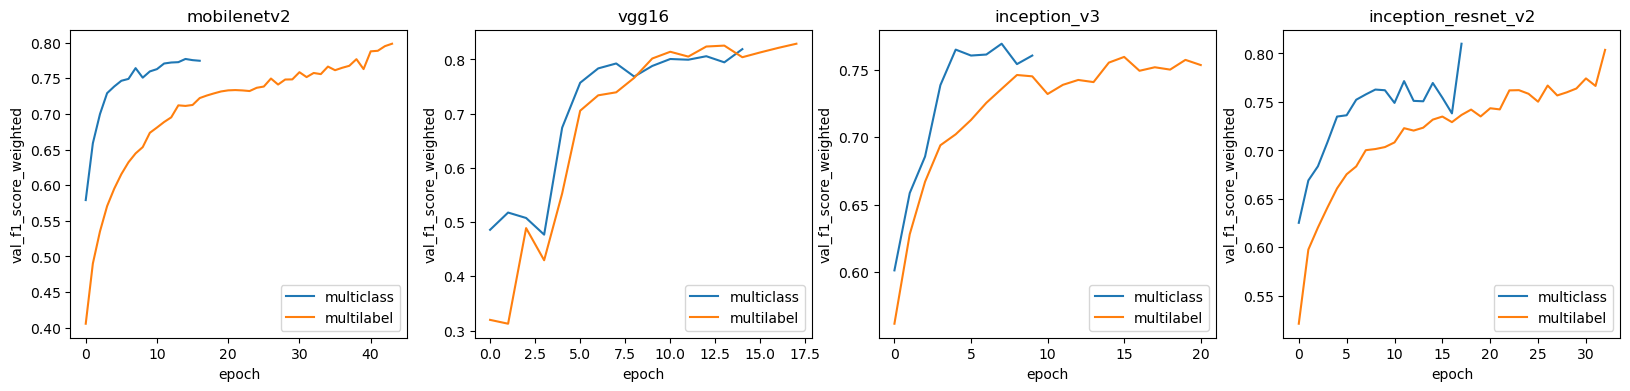

In [25]:
metric = "val_loss"
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for i, model_name in enumerate(model_names):
    data1 = fmc[fmc.model.str.contains(model_name)].sort_values(by="epoch")
    data2 = fml[fml.model.str.contains(model_name)].sort_values(by="epoch")
    
    ax = axes[i]
    ax.plot(data1.epoch, data1[metric], label="multiclass")
    ax.plot(data2.epoch, data2[metric], label="multilabel")
    ax.set(xlabel="epoch", ylabel=metric, title=model_name)
    ax.legend()


metric = "val_f1_score_weighted"
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for i, model_name in enumerate(model_names):
    data1 = fmc[fmc.model.str.contains(model_name)].sort_values(by="epoch")
    data2 = fml[fml.model.str.contains(model_name)].sort_values(by="epoch")
    
    ax = axes[i]
    ax.plot(data1.epoch, data1[metric], label="multiclass")
    ax.plot(data2.epoch, data2[metric], label="multilabel")
    ax.set(xlabel="epoch", ylabel=metric, title=model_name)
    ax.legend()


In [32]:
max_f1 = df.loc[df['val_f1_score_weighted'].idxmax()]
max_f1

categorical_accuracy                                                 0.983754
f1_score_per_class          tf.Tensor(\n[0.9714285  0.98305076 0.9765257  ...
f1_score_weighted                                                    0.974214
loss                                                                 0.112746
val_categorical_accuracy                                             0.835271
val_f1_score_per_class      tf.Tensor(\n[0.         0.49999994 0.66666657 ...
val_f1_score_weighted                                                0.829615
val_loss                                                             0.701986
model                                      inception_v3_unfiltered_multiclass
epoch                                                                      12
type                                                                       FT
binary_accuracy                                                           NaN
val_binary_accuracy                                             